In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/data_pp.csv')

In [12]:
df.head()

,length,key,duration_ms,tempo,time_signature,loudness,date_year,date_month,date_day,decade,...,instrumentalness,danceability,valence,liveness,mode,energy,id,album_id,billboard,track_length
0,-0.813197,0.492978,1.515573,1.731286,-2.024357,-11.998,-1.774181,1.489467,1.366815,-1.594762,...,0.000070,0.523,0.582,0.151,1.0,0.287,5EPMGpzwuUAutClCLFyGVh,7hI0QCwcx9GB8MZK24IfTT,1.0,-0.057751
1,-0.813197,1.337299,-0.529066,-0.797157,0.244413,-8.582,-1.774181,1.489467,1.366815,-1.594762,...,0.000002,0.605,0.811,0.182,1.0,0.570,0ZhwlFI7I69yaXphO7t5R8,7hI0QCwcx9GB8MZK24IfTT,1.0,-0.057751
2,-0.813197,-0.351344,-0.433232,-1.481551,0.244413,-8.068,-1.774181,1.489467,1.366815,-1.594762,...,0.000260,0.653,0.666,0.118,0.0,0.585,1eNkU8sQM34I7huNFBeSPj,7hI0QCwcx9GB8MZK24IfTT,1.0,-0.057751
3,-0.103687,1.055859,0.668297,0.208501,0.244413,-10.404,-1.709138,1.489467,0.659293,-1.594762,...,0.400000,0.390,0.641,0.990,1.0,0.666,6ZgVcl8YEtQGNt7R0CJ712,6s22OUJ3b1y5NRQ3BPZLZw,1.0,-0.282775
4,-0.103687,1.055859,0.331644,0.688428,0.244413,-8.404,-1.709138,1.489467,0.659293,-1.594762,...,0.000982,0.409,0.745,0.459,1.0,0.737,12bYfrWCQPbXvwEw72t8EC,6s22OUJ3b1y5NRQ3BPZLZw,1.0,-0.282775


In [13]:
df['billboard'].value_counts(normalize=True)

1.0    0.888632
0.0    0.111368
Name: billboard, dtype: float64

In [14]:
# dropping ID, AlbumId, date_month and date_day

df_fit = df.drop(['date_day','id','album_id','date_month','decade'],axis=1)

In [15]:
df_fit.head()

,length,key,duration_ms,tempo,time_signature,loudness,date_year,acousticness,speechiness,instrumentalness,danceability,valence,liveness,mode,energy,billboard,track_length
0,-0.813197,0.492978,1.515573,1.731286,-2.024357,-11.998,-1.774181,0.541,0.0802,0.000070,0.523,0.582,0.151,1.0,0.287,1.0,-0.057751
1,-0.813197,1.337299,-0.529066,-0.797157,0.244413,-8.582,-1.774181,0.384,0.0458,0.000002,0.605,0.811,0.182,1.0,0.570,1.0,-0.057751
2,-0.813197,-0.351344,-0.433232,-1.481551,0.244413,-8.068,-1.774181,0.628,0.0656,0.000260,0.653,0.666,0.118,0.0,0.585,1.0,-0.057751
3,-0.103687,1.055859,0.668297,0.208501,0.244413,-10.404,-1.709138,0.168,0.0597,0.400000,0.390,0.641,0.990,1.0,0.666,1.0,-0.282775
4,-0.103687,1.055859,0.331644,0.688428,0.244413,-8.404,-1.709138,0.155,0.0605,0.000982,0.409,0.745,0.459,1.0,0.737,1.0,-0.282775


In [16]:
df_fit = df_fit.sort_values('date_year')

In [17]:
## Preparing data

X = df_fit.drop(['billboard'],axis=1)
y = df_fit['billboard']



In [12]:
## testing the splits
from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=2)
for i_other,i_test in splitter.split(X, y):
    X_other, y_other = X.iloc[i_other], y.iloc[i_other]
    X_test, y_test = X.iloc[i_test], y.iloc[i_test]
        

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


def ML_pipeline_GridSearchCV(X,y,random_state,n_folds):
    
    # create a test set based on groups
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    #pipe_SVC = make_pipeline(SVC())
    #pipe_RandomForest = make_pipeline(RandomForestClassifier(n_estimators=100,random_state=random_state))
    #pipe_LogisticRegression = make_pipeline(LogisticRegression(solver='saga',max_iter=10000,random_state=random_state))
    #pipe_KNN = make_pipeline(KNeighborsClassifier(n_jobs=-1))
    #pipe_LDA = make_pipeline(LDA())
    #pipe_adaboost = make_pipeline(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,random_state=random_state))
    #pipe_xgboost = make_pipeline(XGBClassifier(n_estimators=100, objective='binary:logistic', learning_rate=0.3, colsample_bytree=0.9, subsample=0.66,
    #               silent=False, nthread=1))
    
    # the parameter(s) we want to tune
    #param_grid_SVC = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
    #param_grid_randomForest = {'randomforestclassifier__max_depth': np.linspace(2,10,num=9,dtype=int),'randomforestclassifier__min_samples_split': np.linspace(2,10,num=9,dtype=int)}
    #param_grid_logisticregression = {'logisticregression__penalty': ['l1','l2'],'logisticregression__C': np.logspace(-4, 4, 20)}
    #param_grid_knn = {'kneighborsclassifier__n_neighbors': np.linspace(1,100,20,dtype=int),'kneighborsclassifier__weights': ['uniform','distance'], 'kneighborsclassifier__metric': ['euclidean','manhattan']}
    #param_grid_LDA = {'lineardiscriminantanalysis__solver': ['eigen','lsqr','svd']}
    #param_grid_adaboost = {'adaboostclassifier__learning_rate': np.logspace(-3,4,num=8), 'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R']}
    #param_grid_xgboost = {"xgbclassifier__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    #                      "xgbclassifier__min_child_weight" : [ 1, 3, 5, 7 ],
    #                      "xgbclassifier__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=False, verbose=3, n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

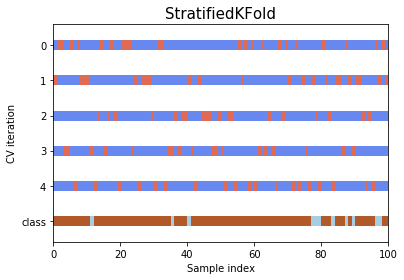

In [19]:
from sklearn.model_selection import StratifiedKFold
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=plt.cm.coolwarm,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=plt.cm.Paired)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1.1, -.1], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

groups = [1]*len(X)
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits=5,shuffle=True)
ax = plot_cv_indices(cv, X, y, groups, ax, n_splits=5)
plt.savefig('../figures/CV_split.png')

In [21]:
## SVC-rbf didn't converge for 5 hours
## KNN didn't converge after 12 hours
## Random Forest saved
## logistic regression saved
## LDA saved
## QDA saved
## AdaBoost saved
import pickle
    
test_scores = []
for i in range(5):
    grid, test_score = ML_pipeline_GridSearchCV(X,y,i*42,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    fname = '../results/grid'+str(i)+'.lasso'
    file = open(fname, 'wb')
    pickle.dump(grid,file)
    file.close()
    test_scores.append(test_score)
    
print('test accuracy:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [45]:
## Non Parametric Classification

def ML_pipeline_nonParametric(X,y,random_state):
    
    splitter = TimeSeriesSplit(n_splits=2)
    for i_other,i_test in splitter.split(X, y):
        X_other, y_other = X.iloc[i_other], y.iloc[i_other]
        X_test, y_test = X.iloc[i_test], y.iloc[i_test]
    clf = QDA()
    clf.fit(X_other,y_other)
    return clf, clf.score(X_test,y_test)
    # splitter for _other

In [46]:
test_scores = []
for i in range(5):
    clf, test_score = ML_pipeline_nonParametric(X,y,i*42)
    fname = '../results/grid'+str(i)+'.qda'
    file = open(fname, 'wb')
    pickle.dump(grid,file)
    file.close()
    test_scores.append(test_score)
    
print('test accuracy:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))

test accuracy: 0.87 +/- 0.0
